In [1]:
import xlwings as xw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [ ]:
book = xw.Book("gold.xlsx")
book.name

'gold.xlsx'

In [3]:
book.sheets

Sheets([<Sheet [gold.xlsx]预测值分析>, <Sheet [gold.xlsx]指数合理性判断>])

In [4]:
sheet1 = book.sheets['预测值分析']
sheet2 = book.sheets['指数合理性判断']

In [5]:
df1 = sheet1["A1"].expand().options(pd.DataFrame, index=True).value
df1

,收盘价
日期,
2015-04-30,1183.0
2015-05-31,1189.0
2015-06-30,1172.0
2015-07-31,1095.0
2015-08-31,1134.0
...,...
2024-12-31,2624.0
2025-01-31,2797.0
2025-02-28,2856.0


In [6]:
df1.index

DatetimeIndex(['2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
               '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
               '2015-12-31', '2016-01-31',
               ...
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-29', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30'],
              dtype='datetime64[ns]', name='日期', length=121, freq=None)

In [7]:
df1.columns

Index(['收盘价'], dtype='object')

In [8]:
df1.dtypes

收盘价    float64
dtype: object

In [9]:
from pywander.math.excel import to_excel_int_time_v

print(to_excel_int_time_v(df1.index.to_pydatetime()))

[42124 42155 42185 42216 42247 42277 42308 42338 42369 42400 42429 42460
 42490 42521 42551 42582 42613 42643 42674 42704 42735 42766 42794 42825
 42855 42886 42916 42947 42978 43008 43039 43069 43100 43131 43159 43190
 43220 43251 43281 43312 43343 43373 43404 43434 43465 43496 43524 43555
 43585 43616 43646 43677 43708 43738 43769 43799 43830 43861 43890 43921
 43951 43982 44012 44043 44074 44104 44135 44165 44196 44227 44255 44286
 44316 44347 44377 44408 44439 44469 44500 44530 44561 44592 44620 44651
 44681 44712 44742 44773 44804 44834 44865 44895 44926 44957 44985 45016
 45046 45077 45107 45138 45169 45199 45230 45260 45291 45322 45351 45382
 45412 45443 45473 45504 45535 45565 45596 45625 45657 45688 45716 45747
 45777]


In [10]:

df1['int_time'] = to_excel_int_time_v(df1.index.to_pydatetime())
df1

,收盘价,int_time
日期,,
2015-04-30,1183.0,42124
2015-05-31,1189.0,42155
2015-06-30,1172.0,42185
2015-07-31,1095.0,42216
2015-08-31,1134.0,42247
...,...,...
2024-12-31,2624.0,45657
2025-01-31,2797.0,45688
2025-02-28,2856.0,45716


In [11]:
df1['收盘价'].to_numpy()

array([1183., 1189., 1172., 1095., 1134., 1114., 1142., 1064., 1060.,
       1117., 1237., 1232., 1293., 1214., 1321., 1350., 1308., 1315.,
       1277., 1172., 1151., 1210., 1248., 1248., 1267., 1268., 1241.,
       1269., 1321., 1279., 1271., 1274., 1302., 1344., 1317., 1324.,
       1315., 1297., 1252., 1223., 1201., 1191., 1214., 1221., 1282.,
       1320., 1312., 1291., 1283., 1305., 1409., 1413., 1519., 1472.,
       1513., 1464., 1517., 1586., 1584., 1571., 1680., 1726., 1784.,
       1974., 1969., 1885., 1878., 1777., 1896., 1846., 1733., 1707.,
       1768., 1906., 1769., 1813., 1813., 1756., 1782., 1773., 1828.,
       1796., 1907., 1937., 1896., 1837., 1806., 1765., 1710., 1659.,
       1633., 1768., 1824., 1927., 1827., 1967., 1989., 1962., 1919.,
       1964., 1939., 1848., 1982., 2035., 2062., 2037., 2043., 2232.,
       2291., 2327., 2326., 2445., 2503., 2635., 2746., 2657., 2624.,
       2797., 2856., 3120., 3272.])

In [12]:
df1['int_time'].to_numpy()

array([42124, 42155, 42185, 42216, 42247, 42277, 42308, 42338, 42369,
       42400, 42429, 42460, 42490, 42521, 42551, 42582, 42613, 42643,
       42674, 42704, 42735, 42766, 42794, 42825, 42855, 42886, 42916,
       42947, 42978, 43008, 43039, 43069, 43100, 43131, 43159, 43190,
       43220, 43251, 43281, 43312, 43343, 43373, 43404, 43434, 43465,
       43496, 43524, 43555, 43585, 43616, 43646, 43677, 43708, 43738,
       43769, 43799, 43830, 43861, 43890, 43921, 43951, 43982, 44012,
       44043, 44074, 44104, 44135, 44165, 44196, 44227, 44255, 44286,
       44316, 44347, 44377, 44408, 44439, 44469, 44500, 44530, 44561,
       44592, 44620, 44651, 44681, 44712, 44742, 44773, 44804, 44834,
       44865, 44895, 44926, 44957, 44985, 45016, 45046, 45077, 45107,
       45138, 45169, 45199, 45230, 45260, 45291, 45322, 45351, 45382,
       45412, 45443, 45473, 45504, 45535, 45565, 45596, 45625, 45657,
       45688, 45716, 45747, 45777])

## 趋势线模拟为什么选择指数函数
认为其有一个内在的增加动力，随着时间有着一定的增长率，那么趋势线模拟可以选用指数函数。



![img](趋势线指数规律.png)

[0.02575306 2.51132907]
[[ 0.00011866 -0.00103503]
 [-0.00103503  0.00903231]]


0.8590111639310656

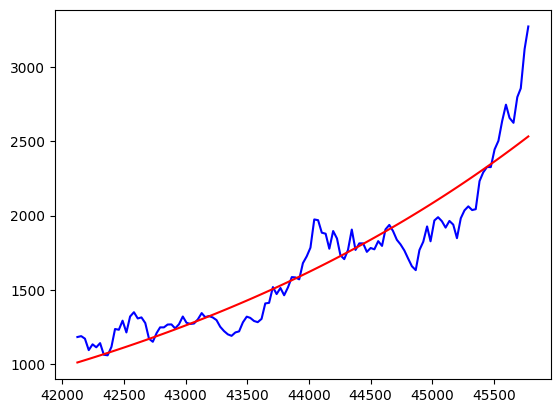

In [13]:
xdata = df1['int_time'].to_numpy()
ydata = df1['收盘价'].to_numpy()
xdata = xdata.astype(np.float64)

def func(x, a, b):
    # 因为np.exp接受过大的数会造成数值溢出 
    # 必须先改造输入xdata 让其变得小一些
    return a * np.exp(b * (x * 0.0001))

fitting_opts = {
    #'maxfev': 10,  # 设置最大迭代次数
    #'method': 'lm'
}

popt, pcov = curve_fit(func, xdata, ydata , **fitting_opts)
print(popt)
print(pcov)

# 实际曲线
plt.plot(xdata, ydata, 'b-', label='data')

# 预测曲线
predict_ydata = func(xdata, *popt)
plt.plot(xdata, predict_ydata, 'r-')

r2_score(ydata, predict_ydata)

In [14]:
book.names['Var_1'].delete()
book.names['Var_2'].delete()

In [15]:
book.names.add("Var_1", popt[0])
book.names.add("Var_2", popt[1])
print(book.names)

[<Name 'Var_1': =0.0257530557426679>, <Name 'Var_2': =2.51132906573386>]


In [16]:
book.save()
#app = book.app
#%app.quit()